In [1]:
from scip_routing.compact import solve_compact
from scip_routing.solver import solve_colgen
from scip_routing.utils import minify_instance, instance_graph
import cvrplib
import matplotlib.pyplot as plt
from IPython import display
import time

In [10]:
%matplotlib inline
def demo(solving_fn, max_nodes=40):
    current_results = {"nodes": [], "time": []}
    instance, sol = cvrplib.download('R101', solution=True)

    for i in range(1, max_nodes):
        # load instance
        mini_instance = minify_instance(instance, i)
        graph = instance_graph(mini_instance)

        # solve 
        model = solving_fn(graph, instance=mini_instance, verbosity=0)


        # plot results
        current_results["nodes"].append(i)
        current_results["time"].append(model.getSolvingTime())


        plt.plot(current_results["nodes"], current_results["time"])
        plt.show()

        if i < max_nodes-1:
            display.display(plt.gcf())    
            display.clear_output(wait=True)

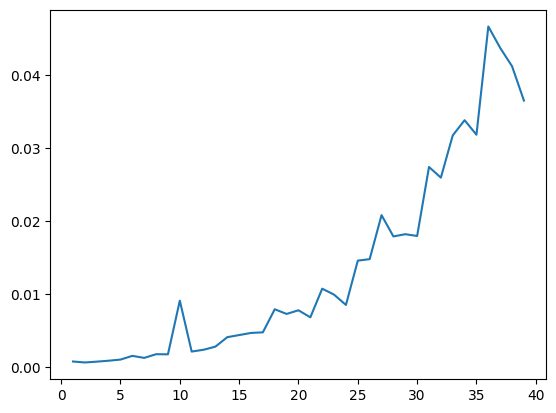

In [11]:
%matplotlib inline
demo(solve_colgen)

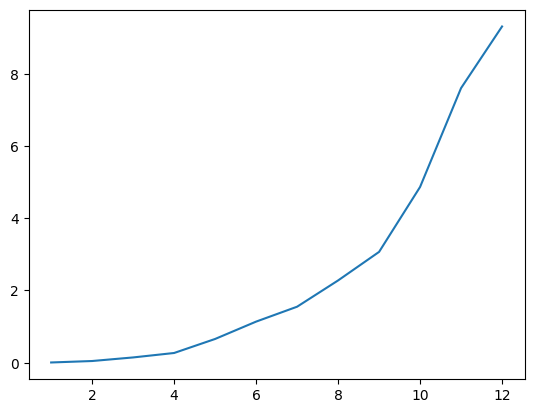

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline
demo(solve_compact)